In [2]:
import pandas as pd

In [3]:
import numpy as np

In [82]:
medical_df = pd.read_csv('insurance.csv')

In [5]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
import plotly.express as px
import matplotlib

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
fig = px.histogram(medical_df, x='age', marginal = 'box', nbins = 47, title= 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df, x='bmi', color_discrete_sequence= ['red'] ,marginal = 'box', nbins = 47, title= 'Distribution of bmi')
fig.update_layout(bargap = 0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df, x='charges', marginal = 'box', color = 'smoker', color_discrete_sequence= ['green', 'grey'] , nbins = 47, title= 'Distribution of charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [14]:
fig = px.histogram(medical_df, x='charges', marginal = 'box', color = 'sex', color_discrete_sequence= ['green', 'grey'] , nbins = 47, title= 'Distribution of charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df, x='charges', marginal = 'box', color = 'region', color_discrete_sequence= ['green', 'grey'] , nbins = 47, title= 'Distribution of charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
medical_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
smoker_value_counts = px.histogram(medical_df, x = 'smoker', color = 'sex')
smoker_value_counts

In [18]:
fig = px.scatter(medical_df, x = 'age', y = 'charges', color = 'smoker', opacity = 0.8, hover_data=['sex'], title = 'Age vs Changes')
fig.show()

In [19]:
fig = px.scatter(medical_df, x = 'bmi', y = 'charges', color = 'smoker', opacity = 0.8, hover_data=['sex'], title = 'BMI vs Changes')
fig.show()

In [20]:
fig = px.violin(medical_df, x = 'sex', y = 'charges')
fig.show()

In [21]:
medical_df.charges.corr(medical_df.age), medical_df.charges.corr(medical_df.bmi), medical_df.charges.corr(medical_df.children)

(0.2990081933306476, 0.19834096883362878, 0.06799822684790469)

In [83]:
smoker_values = {'no' : 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df['smoker'] = smoker_numeric

In [23]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984782

In [24]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [25]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [26]:
non_smoker_df = medical_df[medical_df.smoker == 0]

In [27]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,0,southwest,11411.68500
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

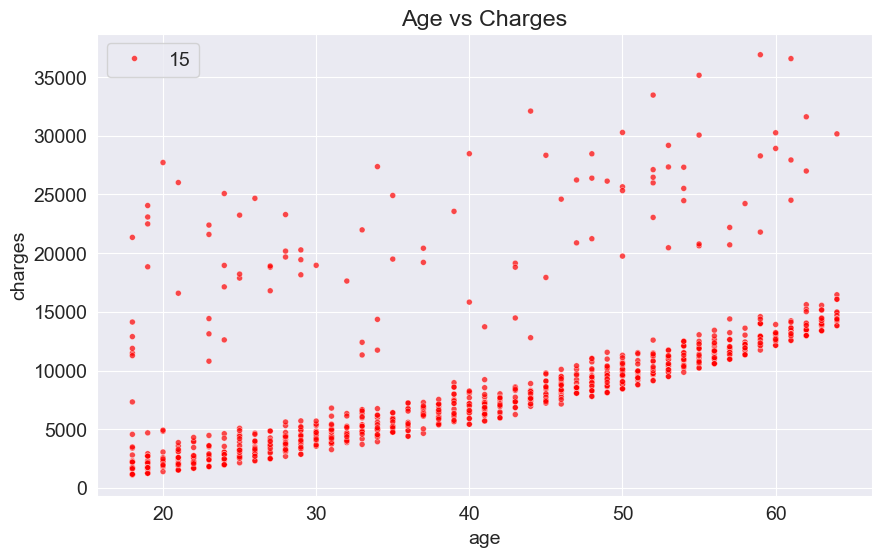

In [28]:
plt.title('Age vs Charges')
sns.scatterplot( non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, size = 15, color = 'red')

In [29]:
def estimate_charges(age, w, b):
    return w*age  + b

In [30]:
w = 50
b = 100

In [31]:
estimate_charges(40, w,b)

2100

In [32]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [33]:
estimated_charges = estimate_charges(ages, w, b)

In [34]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [35]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated charges')

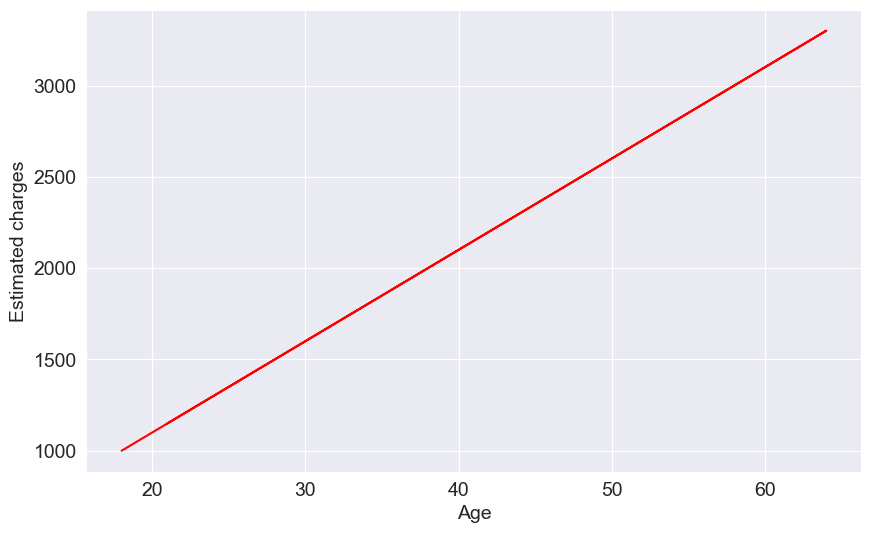

In [36]:
plt.plot(ages, estimated_charges, 'r')
plt.xlabel('Age')
plt.ylabel('Estimated charges')

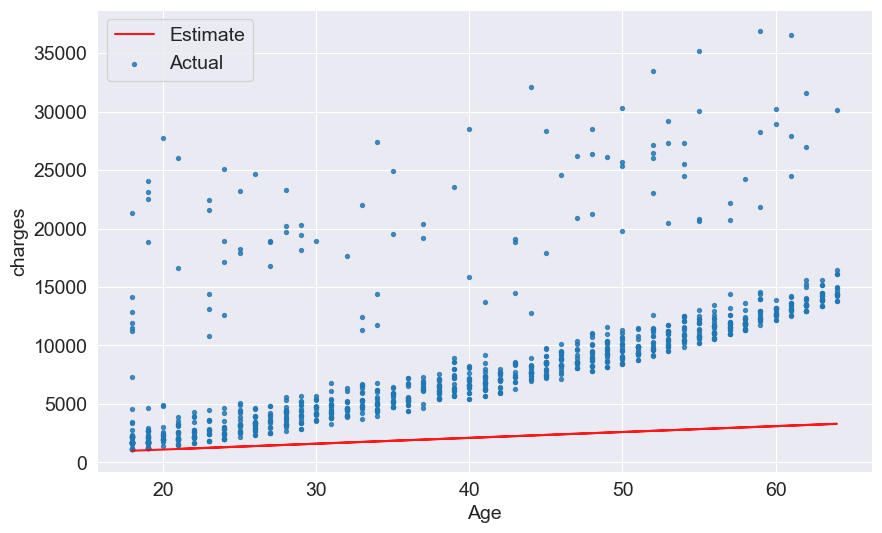

In [37]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9)

plt.scatter(ages, target, s = 8, alpha = 0.8);
plt.xlabel('Age');
plt.ylabel('charges');
plt.legend(['Estimate', 'Actual']);

In [38]:
def try_parameters(w,b):
    target= non_smoker_df.charges
    ages = non_smoker_df.age
    estimated_charges = estimate_charges(ages, w, b)
    plt.scatter( ages,target, alpha = 0.8, s = 8,)
    plt.plot(ages, estimated_charges, 'g', alpha = 0.9)  
    plt.xlabel('Age')
    plt.ylabel('charges')
    plt.legend(['Estimate', 'Actual'])
    

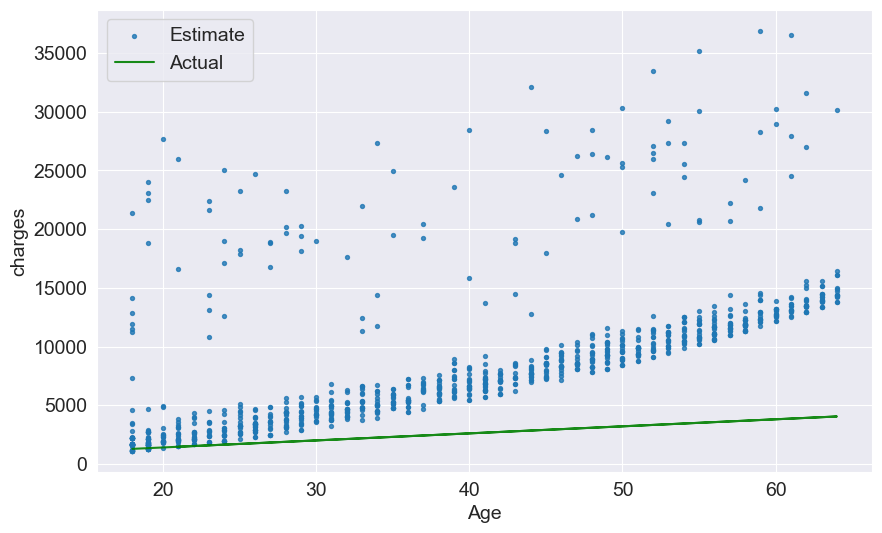

In [39]:
try_parameters(60, 200)

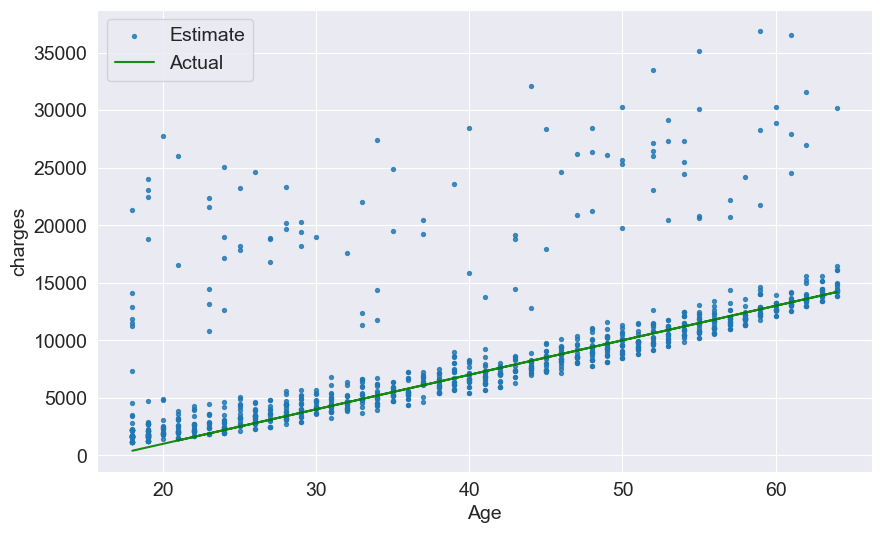

In [40]:
try_parameters(300, -5000)

In [41]:
targets  = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [42]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [43]:
def rsme(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

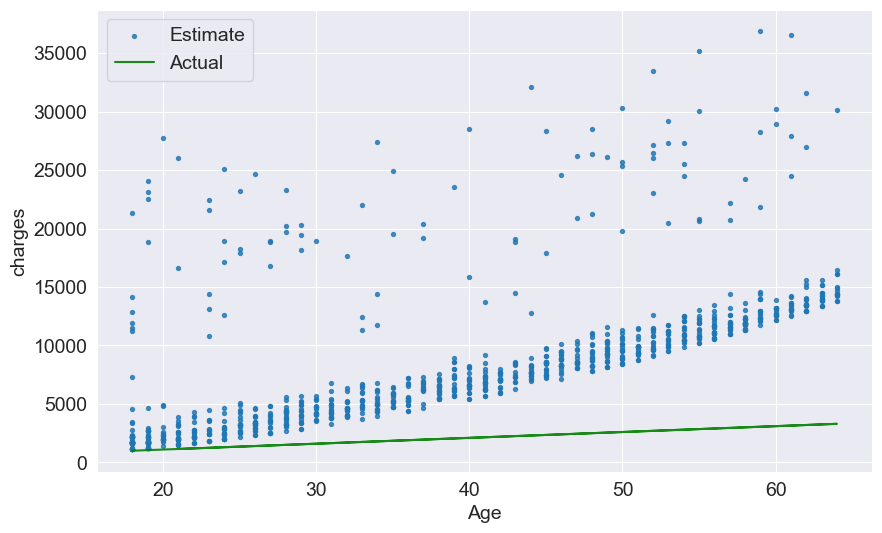

In [44]:
try_parameters(50,100)

In [45]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [46]:
rsme(targets, predicted)

8461.949562575493

In [47]:
def try_parameters(w,b):
    target= non_smoker_df.charges
    ages = non_smoker_df.age
    predictions = estimate_charges(ages, w, b)
    plt.scatter( ages,target, alpha = 0.8, s = 8,)
    plt.plot(ages, estimated_charges, 'g', alpha = 0.9)  
    plt.xlabel('Age')
    plt.ylabel('charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rsme(targets, predictions)
    print('RSME Loss:', loss)
    

RSME Loss: 8461.949562575493


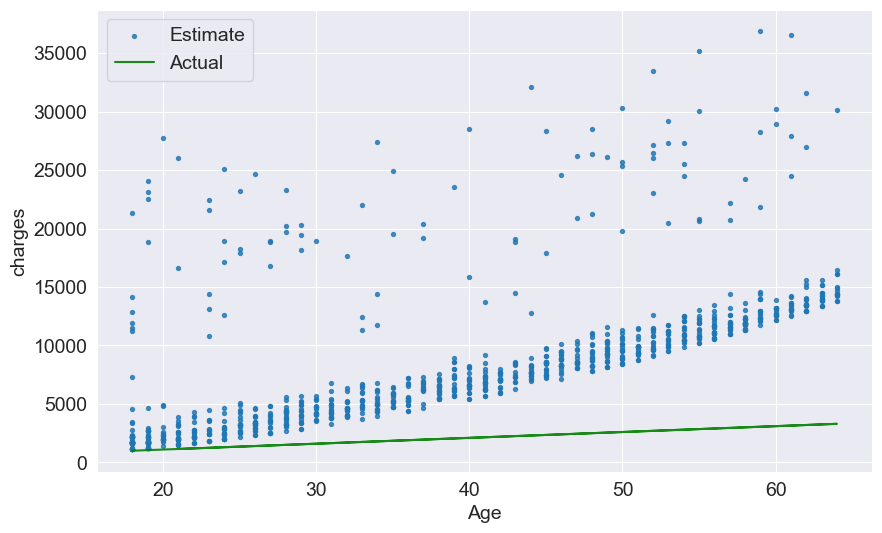

In [48]:
try_parameters(50, 100)

In [49]:
from sklearn.linear_model import LinearRegression


In [50]:
model = LinearRegression()

In [51]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
inputs.shape, targets.shape

((1064, 1), (1064,))

In [52]:
 inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [53]:
model.fit(inputs, targets)

LinearRegression()

In [54]:
model.predict(np.array ([[23], [37], [61]]))

C:\Users\prave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [55]:
predictions = model.predict(inputs)

In [56]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [57]:
rsme(targets, predictions)

4662.505766636395

In [58]:
model.coef_

array([267.24891283])

In [59]:
model.intercept_

-2091.4205565650864

In [77]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,OneHotEncoder(),16884.92400
1,18,male,33.770,1,0,OneHotEncoder(),1725.55230
2,28,male,33.000,3,0,OneHotEncoder(),4449.46200
3,33,male,22.705,0,0,OneHotEncoder(),21984.47061
4,32,male,28.880,0,0,OneHotEncoder(),3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,OneHotEncoder(),10600.54830
1334,18,female,31.920,0,0,OneHotEncoder(),2205.98080
1335,18,female,36.850,0,0,OneHotEncoder(),1629.83350
1336,21,female,25.800,0,0,OneHotEncoder(),2007.94500


In [84]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [91]:
medical_df.rename(columns={'smoker': 'smoker_codes'}, inplace=True)

In [92]:
medical_df

,age,sex,bmi,children,smoker_codes,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [93]:
medical_df.charges.corr(medical_df.smoker_codes)

0.7872514304984782

In [97]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes']], medical_df[['charges']]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)


In [98]:
loss

6056.439217188081

In [101]:
sex_codes = {'male': 1, 'female':0}
medical_df['sex'] = medical_df.sex.map(sex_codes)

In [102]:
medical_df

,age,sex,bmi,children,smoker_codes,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [103]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes', 'sex']], medical_df[['charges']]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)


In [104]:
loss

6056.100708754546

In [118]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_encoded = ohe.fit_transform(medical_df[['region']]).toarray()

In [119]:
ohe_encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [120]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = ohe_encoded 

In [121]:
medical_df

,age,sex,bmi,children,smoker_codes,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [122]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']], medical_df[['charges']]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)


In [123]:
loss

6041.6796511744515

In [129]:
inputs

,age,bmi,children,smoker_codes,sex,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [138]:
model.predict([[18, 10, 0, 1, 0,1,0,0,0]])

C:\Users\prave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[19925.34484753]])

In [140]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
inputs = ss.fit_transform(inputs)

In [143]:
inputs

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])